### Modeling COCO - QA
* [Review](https://arxiv.org/abs/1610.01465)

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import preprocess_data, process_labels,split_data

from src.classifiers import VQADataset
from torch.utils.data import DataLoader

from src.classifiers_cpu_metrics import train_early_fusion, train_late_fusion

In [2]:
PATH = 'Embeddings_vlm/coco-qa/'
FILE = 'embeddings_clip.csv'

FILE_PATH = os.path.join(PATH, FILE)

## Get data

In [3]:
df = pd.read_csv(FILE_PATH)
df.drop(columns=['image_id'], inplace=True)
df.head()

questions    answers  types  split  \
0  what is using umbrellas as a central theme  sculpture      0  train   
1  what walks toward the rope perimeter fence   elephant      0  train   
2             what is the color of the horses      brown      2  train   
3          where is the black cat laying down       sink      3  train   
4          what is the color of the character     purple      2  train   

   image_embedding_0  image_embedding_1  image_embedding_2  image_embedding_3  \
0          -0.002133           0.026865          -0.009941          -0.000407   
1          -0.037488          -0.025273           0.021552           0.056967   
2          -0.050188           0.034539           0.008536           0.017248   
3          -0.003502           0.007140           0.014187           0.052844   
4           0.046207           0.050791          -0.010908           0.025887   

   image_embedding_4  image_embedding_5  ...  text_embedding_502  \
0          -0.001535           0.043021  ...            0.013656   
1           0.010018          -0.042177  ...           -0.007028   
2           0.027789          -0.020876  ...            0.009025   
3           0.012376          -0.005956  ...           -0.012388   
4          -0.029377          -0.023032  ...           -0.009319   

   text_embedding_503  text_embedding_504  text_embedding_505  \
0            0.006139            0.018542           -0.027902   
1           -0.002520            0.001875           -0.028708   
2            0.000571           -0.022466            0.010579   
3            0.034164            0.007408            0.029274   
4           -0.034246            0.002291           -0.004910   

   text_embedding_506  text_embedding_507  text_embedding_508  \
0           -0.010581            0.001189           -0.018054   
1            0.016469           -0.011620           -0.010105   
2           -0.025592            0.034800           -0.007262   
3           -0.018850           -0.007775            0.033192   
4           -0.025292            0.012616           -0.017789   

   text_embedding_509  text_embedding_510  text_embedding_511  
0            0.006616            0.039209           -0.052176  
1            0.034845           -0.021513            0.029620  
2            0.010370           -0.009308            0.008854  
3            0.001180           -0.041182            0.004494  
4           -0.012675           -0.004709            0.028756  

[5 rows x 1028 columns]

## Data Perparation

In [4]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column] #[f'text_{i}']
image_columns = [column for column in df.columns if 'image' in column] #[f'image_{i}']
label_columns = 'answers'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

Train Shape: (78736, 1028)
Test Shape: (38948, 1028)


### Models

In [5]:
text_input_size = len(text_columns)
image_input_size = len(image_columns)
output_size = len(mlb.classes_)
multilabel = False

Training Early Fusion Model:
Model Memory Usage: 0.71 MB
The number of parameters of the model are: 186926


STAGE:2024-02-10 15:33:41 29972:29972 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/20 - Test Accuracy: 0.4328, macro-f1: 0.2418
Epoch 1/20 - Training Time: 7.35 seconds | Inference Time: 4.77 seconds
Epoch 2/20 - Test Accuracy: 0.4132, macro-f1: 0.2756
Epoch 2/20 - Training Time: 6.29 seconds | Inference Time: 4.71 seconds
Epoch 3/20 - Test Accuracy: 0.4186, macro-f1: 0.2829
Epoch 3/20 - Training Time: 6.86 seconds | Inference Time: 5.02 seconds
Epoch 4/20 - Test Accuracy: 0.4391, macro-f1: 0.2954
Epoch 4/20 - Training Time: 7.56 seconds | Inference Time: 5.04 seconds
Epoch 5/20 - Test Accuracy: 0.4383, macro-f1: 0.3028
Epoch 5/20 - Training Time: 7.34 seconds | Inference Time: 5.03 seconds
Epoch 6/20 - Test Accuracy: 0.4414, macro-f1: 0.3020
Epoch 6/20 - Training Time: 7.24 seconds | Inference Time: 5.16 seconds
Epoch 7/20 - Test Accuracy: 0.4595, macro-f1: 0.3095
Epoch 7/20 - Training Time: 6.85 seconds | Inference Time: 5.18 seconds
Epoch 8/20 - Test Accuracy: 0.4508, macro-f1: 0.3097
Epoch 8/20 - Training Time: 7.40 seconds | Inference Time: 5.16 seconds


STAGE:2024-02-10 15:38:17 29972:29972 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-10 15:38:18 29972:29972 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch         7.88%       14.487s        58.75%      107.976s       4.386ms      -8.53 Gb     -11.42 Gb         24620  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        32.94%       60.547s        33.53%       61.634s       1.673ms      12.74 Gb      12.73 Gb         36840  
                                   DataParallel.forward         2.92%        5.359s        20.59%       37.844s       1.028ms      12.80 Gb      -5.02

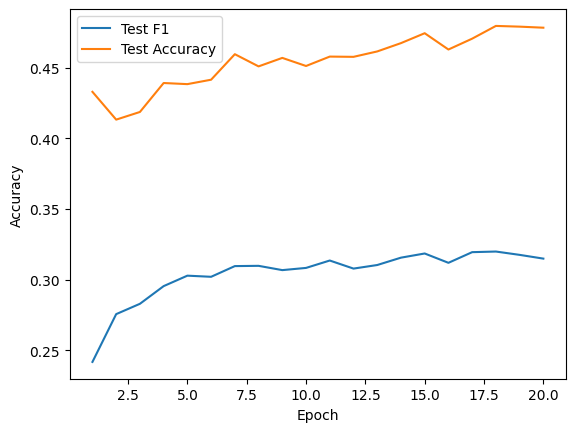

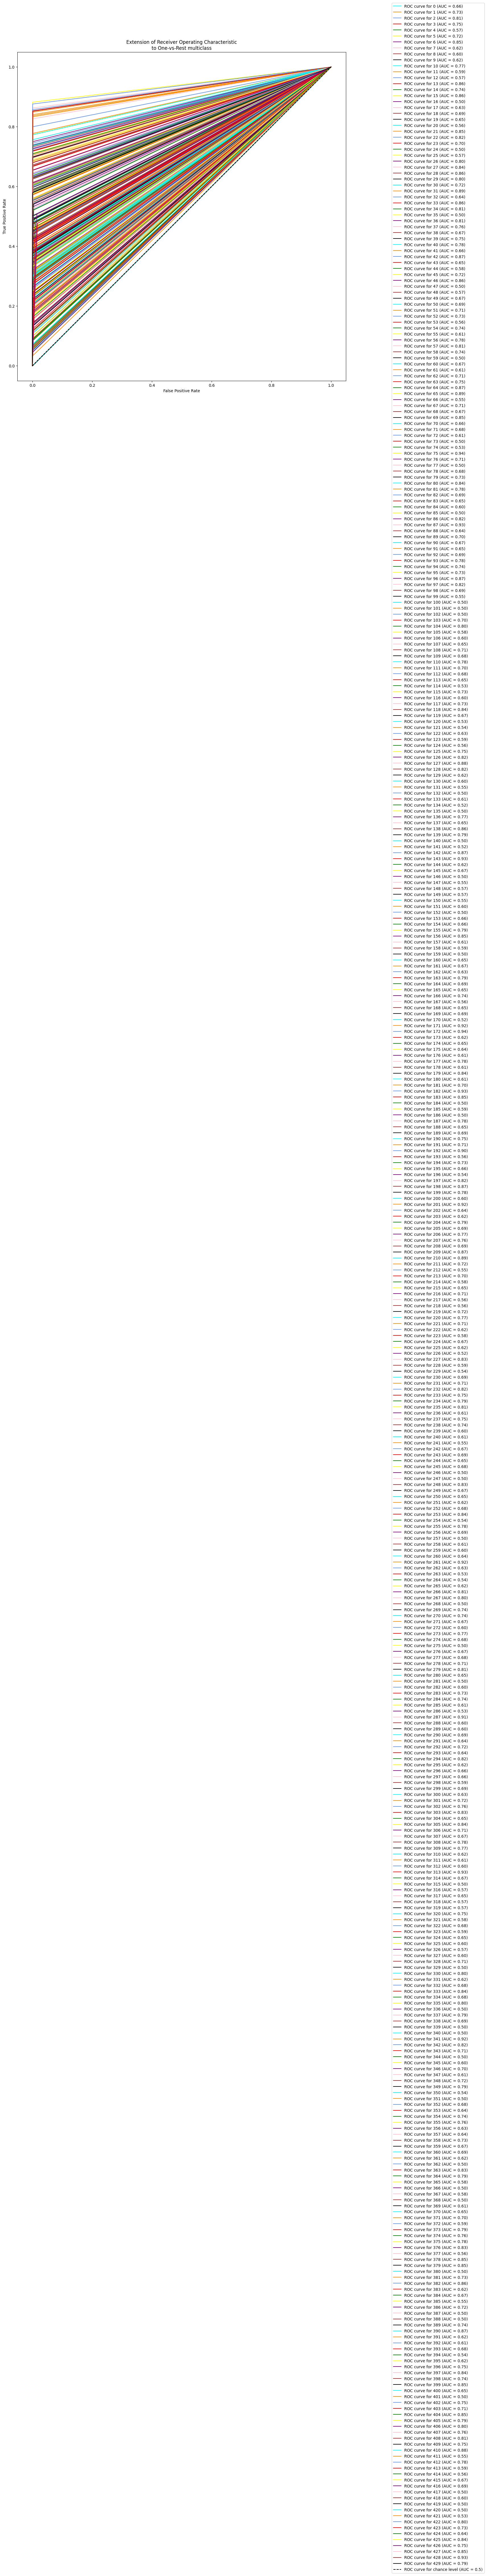

              precision    recall  f1-score   support

           0       0.15      0.32      0.21        41
           1       0.69      0.46      0.55       439
           2       0.68      0.61      0.65       163
           3       0.43      0.50      0.46        32
           4       0.05      0.13      0.07        15
           5       0.28      0.44      0.34        34
           6       0.56      0.71      0.63        31
           7       0.12      0.25      0.16        12
           8       0.12      0.20      0.15        10
           9       0.12      0.24      0.16        21
          10       0.25      0.55      0.34        11
          11       0.15      0.17      0.16        52
          12       0.10      0.14      0.12        29
          13       0.81      0.72      0.76       309
          14       0.64      0.47      0.54       116
          15       0.59      0.71      0.64        97
          16       0.00      0.00      0.00         7
          17       0.14    

In [6]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=20, multilabel=multilabel, report=True, p=0.2)

Training Late Fusion Model:
Model Memory Usage: 0.46 MB
The number of parameters of the model are: 121390


STAGE:2024-02-10 15:57:11 29972:29972 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/20 - Test Accuracy: 0.3979, macro-f1: 0.2253
Epoch 1/20 - Training Time: 10.39 seconds | Inference Time: 6.29 seconds
Epoch 2/20 - Test Accuracy: 0.4191, macro-f1: 0.2766
Epoch 2/20 - Training Time: 10.28 seconds | Inference Time: 6.35 seconds
Epoch 3/20 - Test Accuracy: 0.4217, macro-f1: 0.2801
Epoch 3/20 - Training Time: 10.83 seconds | Inference Time: 6.47 seconds
Epoch 4/20 - Test Accuracy: 0.4326, macro-f1: 0.2944
Epoch 4/20 - Training Time: 11.03 seconds | Inference Time: 6.32 seconds
Epoch 5/20 - Test Accuracy: 0.4407, macro-f1: 0.3008
Epoch 5/20 - Training Time: 11.79 seconds | Inference Time: 6.29 seconds
Epoch 6/20 - Test Accuracy: 0.4557, macro-f1: 0.3056
Epoch 6/20 - Training Time: 11.96 seconds | Inference Time: 6.38 seconds
Epoch 7/20 - Test Accuracy: 0.4460, macro-f1: 0.3066
Epoch 7/20 - Training Time: 12.61 seconds | Inference Time: 6.42 seconds
Epoch 8/20 - Test Accuracy: 0.4425, macro-f1: 0.3047
Epoch 8/20 - Training Time: 12.22 seconds | Inference Time: 6.57 

STAGE:2024-02-10 16:03:35 29972:29972 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-10 16:03:36 29972:29972 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch         8.37%       21.058s        74.28%      186.951s       5.080ms     -10.25 Gb     -15.66 Gb         36800  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        25.24%       63.527s        25.67%       64.598s       1.753ms      12.74 Gb      12.73 Gb         36840  
                              Optimizer.step#AdamW.step         5.67%       14.260s        25.29%       63.659s       2.586ms     948.40 Kb     -21.84

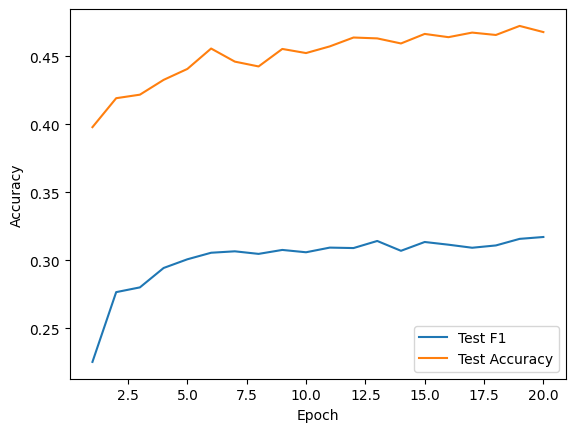

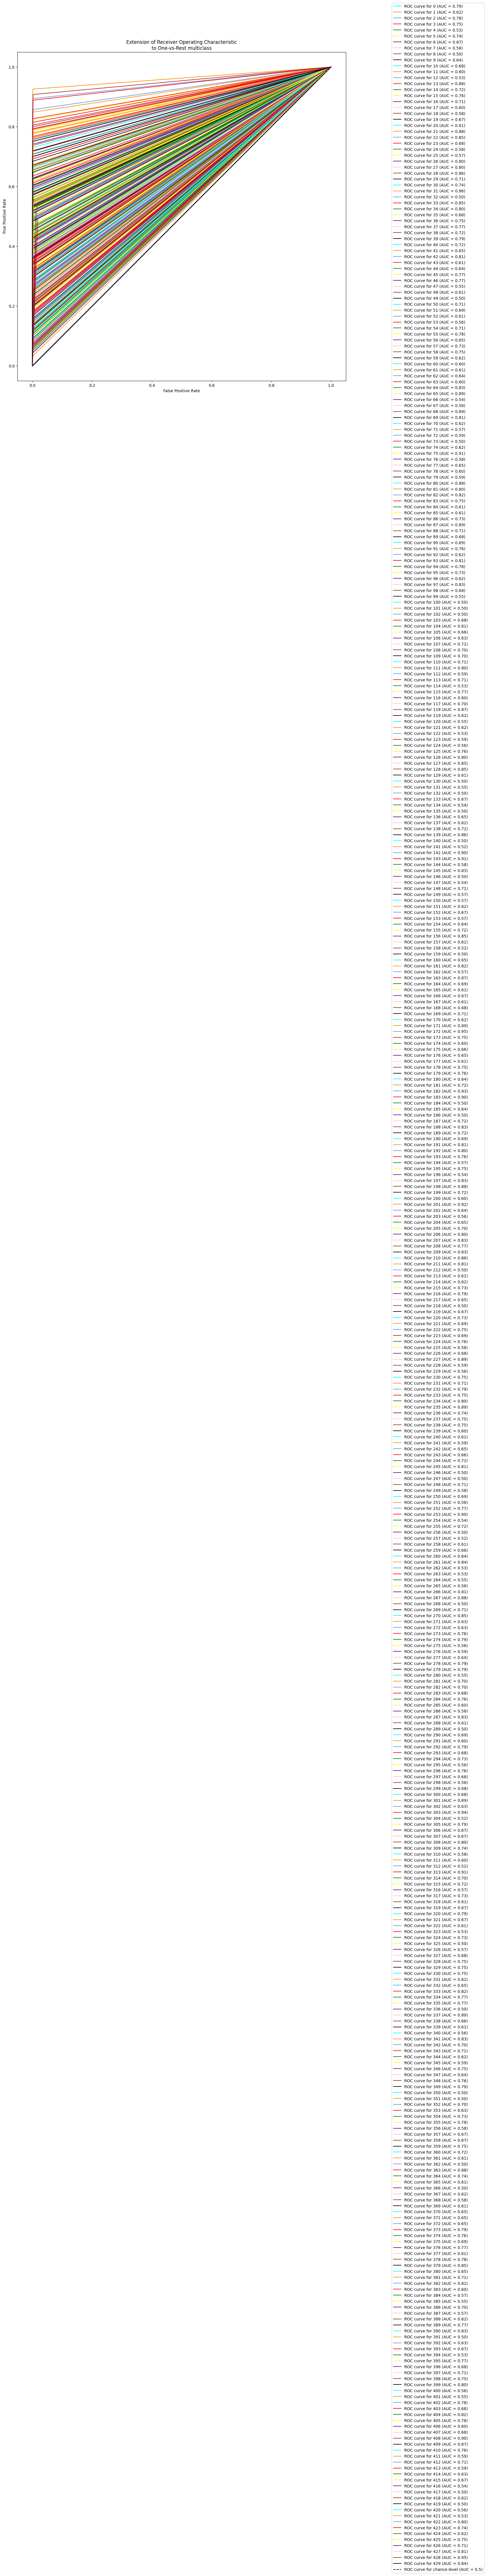

              precision    recall  f1-score   support

           0       0.10      0.59      0.17        41
           1       0.72      0.24      0.36       439
           2       0.61      0.57      0.59       163
           3       0.43      0.50      0.46        32
           4       0.02      0.07      0.03        15
           5       0.44      0.47      0.46        34
           6       0.49      0.74      0.59        31
           7       0.07      0.17      0.10        12
           8       0.00      0.00      0.00        10
           9       0.17      0.29      0.21        21
          10       0.18      0.36      0.24        11
          11       0.24      0.19      0.22        52
          12       0.08      0.07      0.08        29
          13       0.81      0.76      0.79       309
          14       0.74      0.43      0.54       116
          15       0.62      0.53      0.57        97
          16       0.10      0.43      0.16         7
          17       0.16    

In [7]:
# Train late fusion model
print("Training Late Fusion Model:")
train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=20, multilabel=multilabel, report=True, p=0.2)